# Проверяем гипотезы

In [1]:
import numpy as np
import pandas as pd
from math import exp
from math import factorial

from scipy import stats as sts
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
from scipy.stats import binned_statistic_2d
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Задание 1 (однородная игра)

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы 
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [2]:
killer1 = pd.read_csv("data/killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv("data/killer_time2.csv").hours_between_kill.values

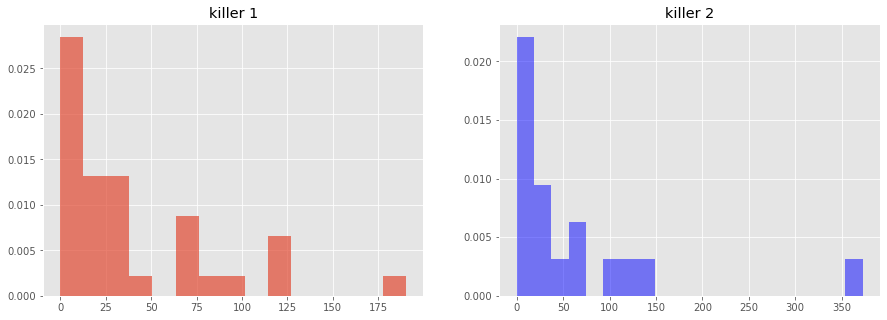

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(killer1, bins=15, density=True, alpha=0.7)
axs[0].set_title('killer 1')
axs[1].hist(killer2, bins=20, density=True, alpha=0.5, color='b')
axs[1].set_title('killer 2');

Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения, $p$-значение, полученное при проверке запишите в переменную `pvalue1`.


<br>
Проверим гипотезу:<br>
$ H_0: \hspace{2mm} \text {Выборки пришли из одного распределения} $<br>
$ H_a: \hspace{2mm} \text {Выборки пришли из разных распределений} $

In [4]:
# your code here
pvalue1 = sts.ks_2samp(killer1, killer2).pvalue
print(f'P-value: {pvalue1:.4}')

P-value: 0.5453


> Нулевая гипотеза на 5% уровне значимости не отвергается.

С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`.


<br>
Проверим гипотезу:<br>
$ H_0: \hspace{2mm} \lambda_1 = 0.026 \hspace{2mm} $<br>
$ H_a: \hspace{2mm}  \lambda_1 \ne 0.026 \hspace{2mm} $

In [5]:
# your code here
pvalue2 = sts.kstest(killer1, 'expon', args=(0, 1/0.026)).pvalue
print(f'P-value: {pvalue2:.4}')

P-value: 0.05735


> Нулевая гипотеза на 5% уровне значимости не отвергается.

## Задание 2 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

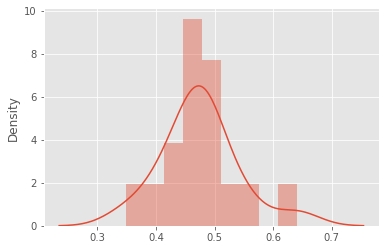

In [6]:
x = pd.read_csv('data/mouses_mirror.txt', header = None)[0].values
sns.distplot(x);

**2.1** Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.<br>

Особенности критерия знаков:
- наблюдения в выборке превращаются в нули и единицы (1 если наблюдение в выборке больше проверяемого значения и 0 если меньше);
- часть информации теряется;
- статистика Т имеет биномиальное распределение $ T = \sum_{i=1}^n [X_i > m_0] \overset{} {\sim} Bin(0.5, n) $;
- при использовании критерия знаков мы руководствуемся только тем, по какую именно сторону от медианы или по какую именно сторону от предыдущего значения нашего наблюдения мы оказались.<br>


Проверим гипотезу: <br>

$ H_0: \hspace{1mm} Med(x) = 0.5 \hspace{2mm} \text{Медиана выборки приходится на значение 1/2} $<br>
$ H_a: \hspace{1mm} Med(x) \ne 0.5 \hspace{2mm} \text{Медиана выборки отличается от указанного значения} $

In [7]:
# your code here
T, pvalue_1 = sign_test(x, mu0=0.5)
print(f'P-value = {pvalue_1:.4}')

P-value = 0.02127


> Нулевая гипотеза на 5% уровне значимости отклоняется. Принимается альтернативная.

**2.2** Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.<br>


Особенности теста Вилкоксона:
- наблюдения в выборке превращаются в ранги (наблюдения в выборке упорядочиваются по возрастанию, каждому наблюдению в выборке присваевается порядковый номер - ранг);
- для сохранения информации на выборку накладывается предположение, заключающееся в том, что выборка пришла к нам из симметричного распределения относительно медианы;
- критерий для проверки $ W = \sum_{i=1}^n rank (|X_i - m_0|) \cdot sign(X_i - m_0) $;
- при больших объемах выборки для апроксимации статистики $ W $ используется нормальное распределение: $ W \overset{asy} {\sim} N \left(0, \frac{n \cdot (n + 1) \cdot (2n +1)}{6} \right) $.<br>



Проверим гипотезу:

$ H_0: \hspace{1mm} Med(x) = 0.5 \hspace{2mm} \text{Медиана выборки приходится на значение 1/2} $<br>
$ H_a: \hspace{1mm} Med(x) \ne 0.5 \hspace{2mm} \text{Медиана выборки отличается от указанного значения} $

In [8]:
# your code here
_, pvalue_2 = sts.wilcoxon(x - 0.5)
print(f'P-value =  {pvalue_2:.4}')

P-value =  0.09344


> Нулевая гипотеза на 5% уровне значимости не отклоняется.

**2.3** Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.<br>

Особенности z-теста:
- используется предположение о том что все наблюдения независимы друг от друга, выбросов нет;
- по ЦПТ среднее при верности нулевой гипотезы будет иметь асимптотически нормальное распределение $ \bar x \overset{asy}{\sim} N \left(\mu_0, \frac{\hat\sigma^2}{n}\right)$;
- критерий для проверки $ z = \frac{\bar x -\mu}{\sqrt{\frac{\sigma^2}{n}}} \overset{asy}{\sim} N (0, 1) $;
- необходимо выполнение всех предпосылок заложенных в ЦПТ.


Проверим гипотезу: <br>

$ H_0: \hspace{1mm} \mu = 0.5 \hspace{2mm} \text{Среднее значение в выборке равно 1/2} $<br>
$ H_a: \hspace{1mm} \mu \ne 0.5 \hspace{2mm} \text{Среднее значение в выборке отличается от указанного значения} $

In [9]:
# your code here
_, pvalue_3 = ztest(x, value=0.5)
print(f'P-value = {pvalue_3:.4}')

P-value = 0.1346


> Нулевая гипотеза на 5% уровне значимости не отклоняется.

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так.<br>

**Ответ**. Значение `pvalue` отличается от теста к тесту из-за особенностей используемого теста. В рассматриваемом случае наиболее мощным будет z-тест.

## Задание 3 (энергетик)

Исследовательница Глафира считает, что любовь к энергетическим напиткам и успешность сдачи экзамена по математической статистике должны быть как-то связаны. Опросив $200$ своих однокурсников, она получила следующие результаты:

- Сдал, пьёт энергетик: 20
- Сдал, не пьёт энергетик: 120
- Завалил, пьёт энергетик: 40
- Завалил, не пьёт энергетик: 20

Правда ли, что энергетик оказывает на успешность сдачи экзамена какое-то влияние? Проверьте гипотезу с помощью критерия Пирсона. В качестве ответа запишите в переменную `pvalue` получившееся $p$-значение.<br>


Проверим гипотезу: <br>

$ H_0: \hspace{1mm} \text{Выборки однородны} $<br>
$ H_a: \hspace{1mm} \text{Выборки не однородны} $

In [10]:
# your code here
df = pd.DataFrame([[20, 40], [120, 20]])
df.columns = ["passed_exam","not_passed_exam"]
df.index = ["energy_drink", "no_energy_drink"]
display(df)

chi, pvalue, k, _ = chi2_contingency(df.values)
print(f'P-value = {pvalue:.4}')

,passed_exam,not_passed_exam
energy_drink,20,40
no_energy_drink,120,20


P-value = 4.506e-13


> Гипотеза об однородности выборок отвергается. Употребление энергетика не влияет на сдачу экзамена.

## Задание 4 (бомбардировки)

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.

In [11]:
df = pd.read_csv('data/london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


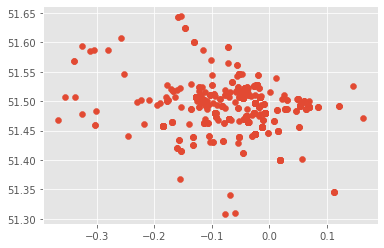

In [12]:
plt.scatter(df.x, df.y);

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`.

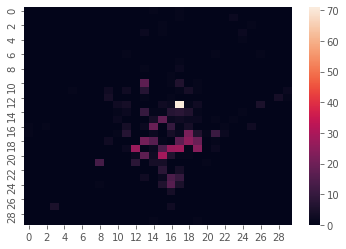

In [13]:
# your code here
binx = np.linspace(df.x.min(), df.x.max(), 31)
biny = np.linspace(df.y.min(), df.y.max(), 31)

ret = binned_statistic_2d(x=df.x.values, y=df.y.values, values=df.x.values, statistic='count', bins=[binx, biny])
sns.heatmap(ret.statistic);

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения. 

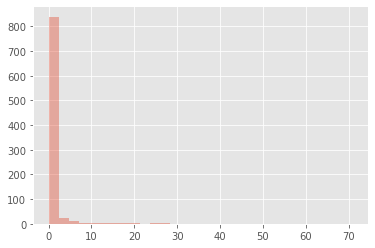

In [14]:
# your code here
z = ret.statistic.reshape(1, 900)
sns.distplot(z, kde=False);

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона. 

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга. 

C помощью критерия Пирсона проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно по аналогии с лекцией. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.<br>

Проверим гипотезу: <br>

$ H_0: \hspace{1mm} \text{Число попаданий в квадрат имеет распределение Пуассона, бомбардировки осуществляются с низкой точностью} $<br>
$ H_a: \hspace{1mm} \text{Число попаданий в квадрат отличается от распределения Пуассона, бомбардировки осуществляются с высокой точностью} $

In [15]:
# your code here

# Вектор z преобразуем в датафрейм
unique, counts = np.unique(z, return_counts=True)
d = dict(zip(unique, counts))
bombing = pd.DataFrame.from_dict(d, orient='index', columns=['number'])
bombing = bombing.reset_index().rename({'index': 'bombs'}, axis=1)
bombing.head()

,bombs,number
0,0.0,774
1,1.0,45
2,2.0,20
3,3.0,11
4,4.0,12


In [16]:
# Рассчитаем параметр лямбда 
lam_hat = np.sum(bombing.index * bombing['number'].values) / bombing['number'].sum()

# Объявим функцию для вычисления вероятности
def poiss_prob(k, lam_hat=lam_hat):
    return (lam_hat ** k / factorial(k)) * exp(-lam_hat)

In [17]:
# Для каждого значения рассчитаем вероятность
bombing['prob'] = bombing['bombs'].apply(poiss_prob)

# Объединим все наблюдения больше 9 в одно
agg_prob = bombing.iloc[9:].prob.sum()
agg_num = bombing.iloc[9:]['number'].sum()

data = pd.concat([bombing.iloc[:9],
                  pd.DataFrame(
                      {'bombs': ['9 and more'],
                      'number': [agg_num],
                      'prob': [agg_prob]}
                  )],
                 axis=0, ignore_index=True)

data

,bombs,number,prob
0,0,774,4.976901e-01
1,1,45,3.472771e-01
2,2,20,1.211611e-01
3,3,11,2.818118e-02
4,4,12,4.916050e-03
5,5,3,6.860620e-04
6,6,5,7.978647e-05
7,7,3,7.953318e-06
8,8,3,6.937061e-07
9,9 and more,24,3.991745e-09


In [18]:
# Рассчитаем значение Т статистики
n = data['number'].sum()
T = (((data['number'] - n * data.prob) ** 2 / (n * data.prob))).sum().round(2)

chi_crit = sts.chi2.ppf(0.95, df=10-1-1).round(2)
print(f'Критическое значение {chi_crit} меньше наблюдаемого {T}')

Критическое значение 15.51 меньше наблюдаемого 160347385.22


Какой вывод мы можем из этого сделать? Правда ли, что бомбардировка осуществлялась прицельно?

> Нулевая гипотеза на 5% уровне значимости отклоняется - число попаданий в квадрат отличается от распределения Пуассона. Бомбардировки велись с прицельной точностью.

## Задание 5 (дискриминация)

Компания Verizon - основная региональная телекоммуникационная компания в западной части США. Она отвечает за поддержание наземной телефонной связи (Incumbent Local Exchange Carrier, ILEC). Кроме того, она продаёт услуги междугородней связи, как и ряд её конкурентов, получивших название (Competing Local Exchange Carriers, CLEC).

Когда что-то шло не так, Verizon отвечала за ремонт своего оборудования и оборудования конкурентов. Она должна была делать ремонт оборудования конкурентов также быстро, как и ремонт своего оборудования. За этим следила комиссия по коммунальным услугам. 

Периодически возникали подозрения, что Verizon ремонтирует чужое оборудование медленнее. Тим Хестерберг, автор [отличной статьи про бустрап,](https://arxiv.org/pdf/1411.5279.pdf) консультировал компанию Verizon во время слушаний о нарушениях. Комиссия сравнивала время ремонта для Verizon и других компаний. Чтобы определить есть ли нарушения, в каждом случае, она проверяла гипотезу о равенстве средних на уровне значимости $1\%$. 

Если более $1\%$ тестов оказывались значимыми, компания должна была бы заплатить высокий штраф. Гипотезы проверялись с помощью $t$-статистик. После консультации Тима, Verizon предложила использовать тесты, робастные к выбросам и никак не завязанные на нормальность исходных распределений.

Мы в этом задании попробуем ответить на тот же вопрос, связанный с дискриминацией, но с помощью бустрапа. Для этого мы построим доверительный интервал для разности медиан и посмотрим входит ли в него ноль. Будем использовать уровень значимости в $1\%$. Доверительный интервал будем строить для одной CLEC-комиании и для Verizon.<br>

- ILEC - Verizion
- CLEC - внешние клиенты 

In [19]:
df = pd.read_csv('data/verizon.txt', sep='\t')
print(df.shape)
df.head()

(1687, 2)


,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


Посмотрим на то, как распределено время ремонта для разных компаний, а также на число наблюдений, которым мы располагаем.

In [20]:
df.groupby('Group')['Time'].agg(['count', 'mean', 'median', 'std'])

,count,mean,median,std
Group,,,,
CLEC,23,16.509130,14.33,19.503576
ILEC,1664,8.411611,3.59,14.690039


В данных есть существенный перекос в количестве наблюдений. Среднее время ремонта CLEC почти вдвое больше, чем для ILEC. Вопрос в том, является ли это свидетельством дискриминации. Если посмотреть на распределение, можно заметить, что распределение времени на ремонт CLEC имеет как минимум один выброс. Тем не менее, если смотреть на медианы, которые робастны (нечувствительны) к выбросам, ситуация, связанная со временем оказывается ещё более драмматичной.

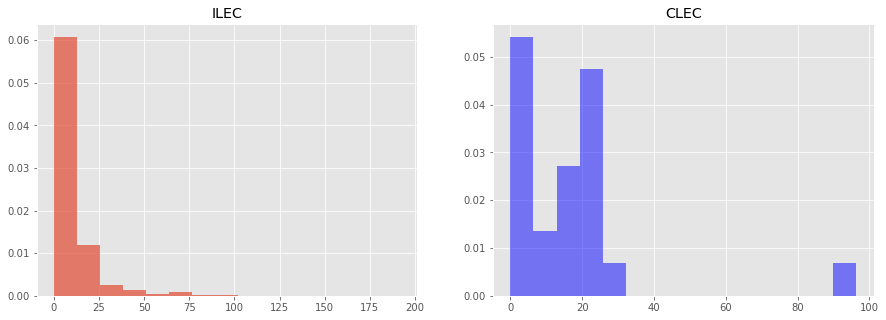

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df[df['Group'] == 'ILEC'].Time, bins=15, density=True, alpha=0.7)
axs[0].set_title('ILEC')
axs[1].hist(df[df['Group'] == 'CLEC'].Time, bins=15, density=True, alpha=0.5, color='b')
axs[1].set_title('CLEC');

__а)__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Эфрона (перцентильный доверительный интервал).

In [22]:
# Объявим функцию для бутстрапа
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

# Сохраним данные в отедльные переменные
clec = df[df['Group'] == 'CLEC'].Time.values
ilec = df[df['Group'] == 'ILEC'].Time.values

# Сбутстраприруем выборку по времени ремонта для CLEC и рассчитаем медиану
clec_boot = get_bootstrap_sample(clec, 10**3)
clec_boot_med = np.median(clec_boot, axis=0)

# Сбутстраприруем выборку по времени ремонта для ILEC и рассчитаем медиану
ilec_boot = get_bootstrap_sample(ilec, 10**3)
ilec_boot_med = np.median(ilec_boot, axis=0)

# Найдем разницу
diff = (clec_boot_med - ilec_boot_med)

# Строим доверительный интервал Эфрона на 1% уровне значимости
alpha = 0.01
left = np.quantile(diff, alpha/2)
right = np.quantile(diff, 1-alpha/2)

print(f'Доверительный интервал [{left:.4}; {right:.4}] ширины {right - left:.3}')

Доверительный интервал [1.73; 17.57] ширины 15.8


В целом, перцентильный интервал выглядит самым простым вариантом оценивания, однако в реальности он даёт весьма плохие результаты, так как сильно зависит от того насколько хорошо изначальная выборка аппроксимирует истинное распределение случайной величины. В данной ситуации из-за того, что исходное распределение асимметрично, мы получаем смещение.

__б)__ Постройте для разницы $med_{CLEC} - med_{Verizion}$ доверительный интервал Холла (обратный перцентильный доверительный интервал).

In [23]:
# your code here

# Рассчитаем разницу медиан CLEC и ILEC
theta_hat = np.median(clec) - np.median(ilec)

# Рассчитаем распределение
diff_h = (clec_boot_med - ilec_boot_med - theta_hat)

# Строим доверительный интервал Холла на 1% уровне значимости
alpha = 0.01
left = theta_hat - np.quantile(diff_h, 1-alpha/2)
right = theta_hat - np.quantile(diff_h, alpha/2)

print(f'Доверительный интервал [{left:.3}; {right:.3}] ширины {right - left:.3}')

Доверительный интервал [3.91; 19.8] ширины 15.8


Холл в своей работе называл перцентильный интервал "the wrong pivot, backwards". Обратный перцентильный интервал для асимметричных распределений делает то же самое, но в обратном направлении.

__в)__ Постройте $t-$ перцентильный доверительный интервал:

1. Найдите точечную оценку неизвестного параметра (разность медиан) и точечную оценку стандартного отклонения
2. Сгенерируйте $10^5$ boostrap-выборок
3. Рассчитайте по каждой выбооке выборочную разницу медиан 
4. Рассчитайте по каждой выборке стандартную ошибку 
5. Найдите по каждой выборке $$t^* = \frac{\hat \theta^{*} - \hat{\theta}}{S^{*}}$$
6. Найдите для $t^{*}$ квантили уровня $0.005$ и $0.995$
7. Постройте доверительный интервал для разности медиан

В качестве $S^{*}$ исполизуйте сумму стандартных отклонений, посчитанных по выборкам $x$ и $y$. Конечно же, мы используем при таком подходе неправильное стандартное отклонение. При этом мы надеемся, что бутсрэп сам поправит нашу ошибку. При таком подходе главное, чтобы знаменатель сходился по вероятности к какому-нибудь пределу.

In [24]:
# your code here

# Сбутстраприруем выборку по времени ремонта для CLEC и рассчитаем выборочные медианы
clec_boot = get_bootstrap_sample(clec, 10**5)
clec_boot_med = np.median(clec_boot, axis=0)

# Сбутстраприруем выборку по времени ремонта для CLEC и рассчитаем выборочные медианы
ilec_boot = get_bootstrap_sample(ilec, 10**5)
ilec_boot_med = np.median(ilec_boot, axis=0)

# Найдем разницу выборочных медиан
diff = clec_boot_med - ilec_boot_med

# Рассчитаем разницу медиан CLEC и ILEC
theta_hat = np.median(clec) - np.median(ilec)

# Рассчитаем стандартную ошибку
std_hat = np.std(clec) + np.std(ilec)

# Рассчитаем t* распределение
diff_t = (diff - theta_hat) / (np.std(clec_boot, axis=0) + np.std(ilec_boot, axis=0))

# Построим t-перцентильный доверительный интервал
alpha = 0.01
left = theta_hat - np.quantile(diff_t, 1-alpha/2) * std_hat
right = theta_hat - np.quantile(diff_t, alpha/2) * std_hat
print(f'Доверительный интервал [{left:.3}; {right:.3}] ширины {right - left:.3}')

Доверительный интервал [1.88; 24.1] ширины 22.2


> Таким образом, ноль не входит в доверительный интервал разницы медиан - время ремонта своего оборудования и оборудования конкурентов статистически значимо отличается.

## Задание 6 (aaaaaaaaand its gone)

Коэффициент асимметрии (skewness) говорит нам о скошенности распределения. В финансах, как правило, люди хотят положительной асимметрии, поскольку это означает, что большие положительные доходы вытянуты в хвост и с какой-то небольшой вероятностью могут быть очень большими. При этом, отрицательные доходы более тесно сгруппированы и предсказуемы.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/868px-Relationship_between_mean_and_median_under_different_skewness.png" width="600"> 
</center>

Подгрузим данные о стоимости акций Яндекса в течение последних $10$ лет. Перейдите от цен к доходностям. С помощью метода `skew()` из модуля `scipy.stats` найдите значение асимметрии доходности акций Яндекса. Запишите получившееся значение в переменную `sk`. Что означает такое значение коэффициента для инвестора?

In [25]:
df = pd.read_csv('data/ynd.tsv', sep='\t')
df['fielddate'] = pd.to_datetime(df['fielddate'])
df.set_index('fielddate', inplace=True)
print(df.shape)
df.head()

(2291, 6)


,open,high,low,close,volume,adjusted
fielddate,,,,,,
2011-05-24,35.000000,42.009998,30.549999,38.840000,70186700.0,38.840000
2011-05-25,37.750000,37.900002,34.400002,35.000000,11761600.0,35.000000
2011-05-26,34.450001,35.450001,34.000000,34.770000,4417500.0,34.770000
2011-05-27,34.750000,35.000000,34.000000,34.450001,2006000.0,34.450001
2011-05-31,34.950001,35.369999,32.610001,33.450001,3981100.0,33.450001


In [26]:
# your code here

# Рассчитаем доходность акций
r = (df.close.diff()/df.close.shift(1)).dropna()
r = r.values

sk = skew(r)
print(f'Распределение скошено влево, коэф. асимметрии = {sk}')

Распределение скошено влево, коэф. асимметрии = -0.15308974700747538


> Отрицательная асимметрия доходности акций означает для инвестора что большие убытки вытянуты в хвост и с какой-то небольшой вероятностью могут быть очень большими.

Будем считать, что доходности акций независимы друг от друга. Проверим с помощью бустрапа гипотезу о том, что коэффициент асимметрии равен нулю. Для этого: 

1. Сгенерируйте $10^4$ бустрап-выборок
2. Найдите бутстрап-распределение статистики $$\delta = \frac{\hat{skew} - skew}{S}$$ Для этого $B$ раз сбустрапируйте выборку и по каждой из них найдите $$\delta^{*} = \frac{\hat{skew^{*}} - \hat{skew}}{S^{*}},$$ где  $\hat{skew^{*}}$ - асимметрия, посчитанная по бустрап-выборке, $\hat{skew}$ - асимметрия исходной выборки, $S^{*}$ - стандартное отклонение, рассчитанное по бустрап-выборке
3. Посчитайте наблюдаемое значение статистики $$\delta_{obs} = \frac{\hat{skew} - 0}{S},$$  где $S$ - стандартное отклонение исходной выборки
4. Из бустрап распределения найдите критические значения статистики, при условии что гипотеза проверяется на уровне значимости $5\%$ против двусторонней альтернативы. 
5. Сравните эти значения и сделайте вывод.

В переменные `d_obs` и `d_crL`, `d_crR` поместите соотвествующие значения. Подробнее про разные виды бустрапа читайте в [этой статье](https://arxiv.org/pdf/1411.5279.pdf)

In [27]:
# your code here
r_boot = get_bootstrap_sample(r, B_sample=10**4)
sigma_ast = (skew(r_boot, axis=0) - sk)/np.std(r_boot, axis=0)

d_obs = sk / np.std(r)

alpha = 0.05
d_crL = np.quantile(sigma_ast, 1-alpha/2)
d_crR = np.quantile(sigma_ast, alpha/2)

print(f'[{d_crR}; {d_crL}]')

[-13.766957331611845; 13.905573139967604]


С помощью получившегося бустрап-распределения и найденной наблюдаемой статистики $d$ оцените $p-$значение. Запишите его в переменную `pvalue`.

In [28]:
# your code here
pvalue = (1 - sum(sigma_ast >= d_obs)/sigma_ast.size) * 2
print(f'P-value = {pvalue:.4}')

P-value = 0.44


Сделайте выводы о том, что происходит с акциями яндекса на бирже. Можно ли заработать на торговле ими за счёт асимметрии?

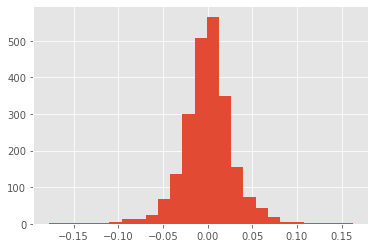

In [29]:
# Посмотрим на распределение доходности
plt.hist(r, bins=25);

**Вывод**. Нулевая гипотеза о равенстве коэффициента асимметрии нулю не отвергается. Это означает, что доходность акций может быть равновероятно как положительной, так и отрицательной. Это означает, что доходность акций яндекса изменяется во времени и может принимать как положительные значения, так и отрицательные. Заработать на торговле ими за счёт положительной асимметрии не получится.

<br>